Clean data to match the picture

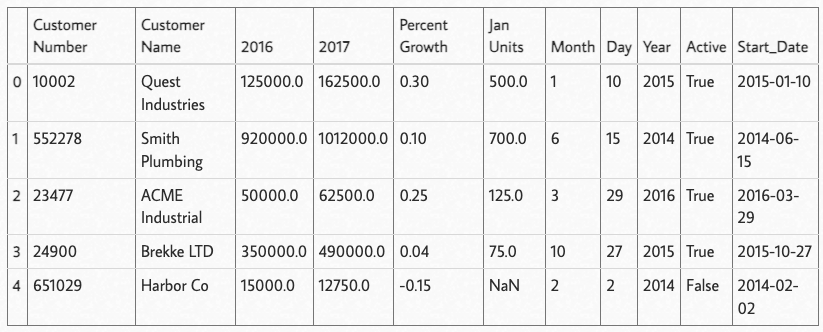

In [239]:
import pandas as pd
import datetime

In [250]:
df = pd.read_csv('sales_data_types.csv')

In [251]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Number  5 non-null      float64
 1   Customer Name    5 non-null      object 
 2   2016             5 non-null      object 
 3   2017             5 non-null      object 
 4   Percent Growth   5 non-null      object 
 5   Jan Units        5 non-null      object 
 6   Month            5 non-null      int64  
 7   Day              5 non-null      int64  
 8   Year             5 non-null      int64  
 9   Active           5 non-null      object 
dtypes: float64(1), int64(3), object(6)
memory usage: 532.0+ bytes


In [224]:
_2016 = list(df['2016'])
_2017 = list(df['2017'])
_percent = list(df['Percent Growth'])

In [225]:
def conversion(li):
    new_li = []
    for i in li:
        if '$' in i:
            j = i[1:-3]
            k = ''.join(j.split(','))
            new_li.append(int(k))
        else:
            j = i[:-1]
            new_li.append(float(j)/100)
    return new_li

In [226]:
_2016 = conversion(_2016)
_2017 = conversion(_2017)
_percent = conversion(_percent)
_converted = {'2016': _2016, '2017': _2017, 'Percent Growth': _percent}
_converted = pd.DataFrame(_converted)
_converted

,2016,2017,Percent Growth
0,125000,162500,0.30
1,920000,1012000,0.10
2,50000,62500,0.25
3,350000,490000,0.04
4,15000,12750,-0.15


In [238]:
df = df.drop(columns=['2016', '2017', 'Percent Growth']).join(_converted)
df = df['Customer Number', 'Customer Name', 'Jan Units', 'Month', 'Day', 'Year',
       'Active', '2016', '2017', 'Percent Growth']

KeyError: ('Customer Number', 'Customer Name', 'Jan Units', 'Month', 'Day', 'Year', 'Active', '2016', '2017', 'Percent Growth')

In [255]:
df['Start_Date'] = pd.to_datetime(df['Year'] + df['Month'] + df['Day'], format="%Y")
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Start_Date
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y,1970-01-01 00:00:00.000002026
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y,1970-01-01 00:00:00.000002035
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y,1970-01-01 00:00:00.000002048
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y,1970-01-01 00:00:00.000002052
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N,1970-01-01 00:00:00.000002018


In [254]:
df.columns

Index(['Customer Number', 'Customer Name', '2016', '2017', 'Percent Growth',
       'Jan Units', 'Month', 'Day', 'Year', 'Active', 'Start_Date'],
      dtype='object')

In [ ]:
for i, j in df['2016'].iterrows():
    if '$' in j:
        j = j[1:-3]
        k = ''.join(j.split(','))
#         new_li.append(int(k))
    else:
        j = j[:-1]
        append
#         new_li.append(float(j)/100)
    